In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


netflix = pd.read_csv(r'C:\Users\claur\OneDrive\Área de Trabalho\portfolio\Netflix\netflix_titles.csv')

display(netflix.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
## DATA TREATMENT / LIMPEZA DOS DADOS

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
As colunas 3, 4, 5 e 6 possuem vaoleres nulos e preciso tratá-los para fazer uma análise mais precisa dos dados.


In [7]:
#qt de linhas e colunas totais

netflix.shape
#print(f'O parâmetro shape me diz que tenho 8807 linhas e 12 colunas.')

(8807, 12)

In [9]:
# isnull() e sum() me mostram diretamente quantos dados nulos tenho em cada coluna respectiva.

netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
linhas = netflix.shape[0]
print(linhas)
print(netflix.shape)
#print(f'Como o df tem {linhas}, posso descobrir a distribuição da porcentagem dos dados nulos nas colunas. Isso me ajudará a priorizar quais colunas devo tratar primeiro.')

8807
(8807, 12)


In [10]:
percentual_nulos = netflix.isnull().sum() / netflix.shape[0] * 100
display(percentual_nulos)
print('Há mais de 30% de dados nulos no df. Assim, devo remover as linhas com valores nulos.')

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Há mais de 30% de dados nulos no df. remover linhas com valores nulos.


In [4]:
netflix = netflix.dropna()
netflix.info()
print('Valores nulos removidos com sucesso.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5332 non-null   object 
 1   type          5332 non-null   object 
 2   title         5332 non-null   object 
 3   director      5332 non-null   object 
 4   cast          5332 non-null   object 
 5   country       5332 non-null   object 
 6   date_added    5332 non-null   object 
 7   release_year  5332 non-null   int64  
 8   rating        5332 non-null   object 
 9   duration      5332 non-null   object 
 10  listed_in     5332 non-null   object 
 11  description   5332 non-null   object 
 12  year_added    5332 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 583.2+ KB
Valores nulos removidos com sucesso.


In [3]:
netflix.shape

(8807, 12)

In [47]:
#counting total null values across entire dataset
nulos = netflix.isnull().sum().sum()
print('Há {} valores nulos.'.format(nulos))

Há 0 valores nulos.


In [13]:
# EDA

netflix.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [16]:
#o count me deixa ver qts dados nao nulos tem no df direto.
#assim pra ver aa porcentagem em relacao ao total é so dividir pelo shape do def
# aqui vai mostrar q tem 100% de nao nulos pq ja limpei os nulos do df
netflix.count() / netflix.shape[0] * 100

show_id         100.0
type            100.0
title           100.0
director        100.0
cast            100.0
country         100.0
date_added      100.0
release_year    100.0
rating          100.0
duration        100.0
listed_in       100.0
description     100.0
dtype: float64

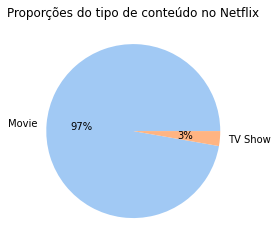

We can see that 70% of the content on Netflix corresponds to movies, while just 30% are tv shows.


In [48]:
plt.title(label='Proporções do tipo de conteúdo no Netflix')
colors = sns.color_palette("pastel")
plt.pie(netflix['type'].value_counts(), labels = netflix['type'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

print('We can see that 70% of the content on Netflix corresponds to movies, while just 30% are tv shows.')

In [49]:
netflix['date_added']
# I just want the year so I can put it in the graph
# there is a pandas method for that called DatetimeIndex().year

7       September 24, 2021
8       September 24, 2021
9       September 24, 2021
12      September 23, 2021
24      September 21, 2021
               ...        
8801         March 9, 2016
8802     November 20, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 5332, dtype: object

In [21]:
# substituindo valores nulos com uma categoria
# ia perder muitos dados sobre a quantidade de tv shows

netflix['director'].fillna('Director Unavailable', inplace=True)
netflix['cast'].fillna('Cast unavailable', inplace=True)
netflix['country'].fillna('Country Unavailable', inplace=True)
netflix.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

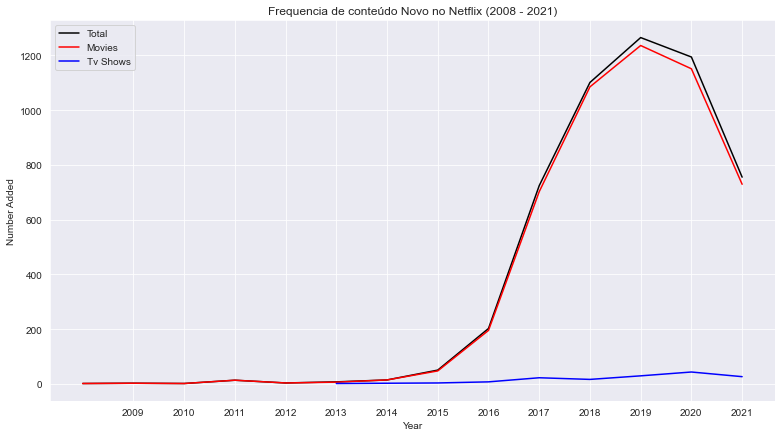

In [22]:
# Now let's move on to explore this same data over time
# how has netflix been adding new movies and tv shows over the years?

# create Year Added column based on the Date Added column already on the Data Frame.
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix['year_added'].apply(lambda x: int(x))

# prepare (?) dataframes to use for plots:
netflix_all = netflix.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added': 'count'})

netflix_movies = netflix[netflix['type'] == 'Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added': 'count'})

netflix_tv = netflix[netflix['type'] == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added': 'count'})

# generate figure
fig, ax = plt.subplots(figsize=(13,7))
plt.title('Frequencia de conteúdo Novo no Netflix (2008 - 2021)')
plt.xlabel('Year')
plt.ylabel('Number Added')
ax.set_xticks(np.arange(2009, 2022, 1))
sns.set_style('dark')

sns.lineplot(data=netflix_all, x='year', y='count', color='black')
sns.lineplot(data=netflix_movies, x='year', y='count', color='red')
sns.lineplot(data=netflix_tv, x='year', y='count', color='blue')
plt.legend(['Total', 'Movies', 'Tv Shows'])
plt.grid()
plt.show()
